In [1]:
from os import truncate
from matplotlib.animation import FuncAnimation
import scipy.signal as spsignal
import scipy.fftpack as spfp
from matplotlib.mlab import detrend
from matplotlib import scale
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Qt5Agg')

[514.  48.   4. ... 110.  10.   1.]
avg freq: 350 hz
132095 samples (377.0s)


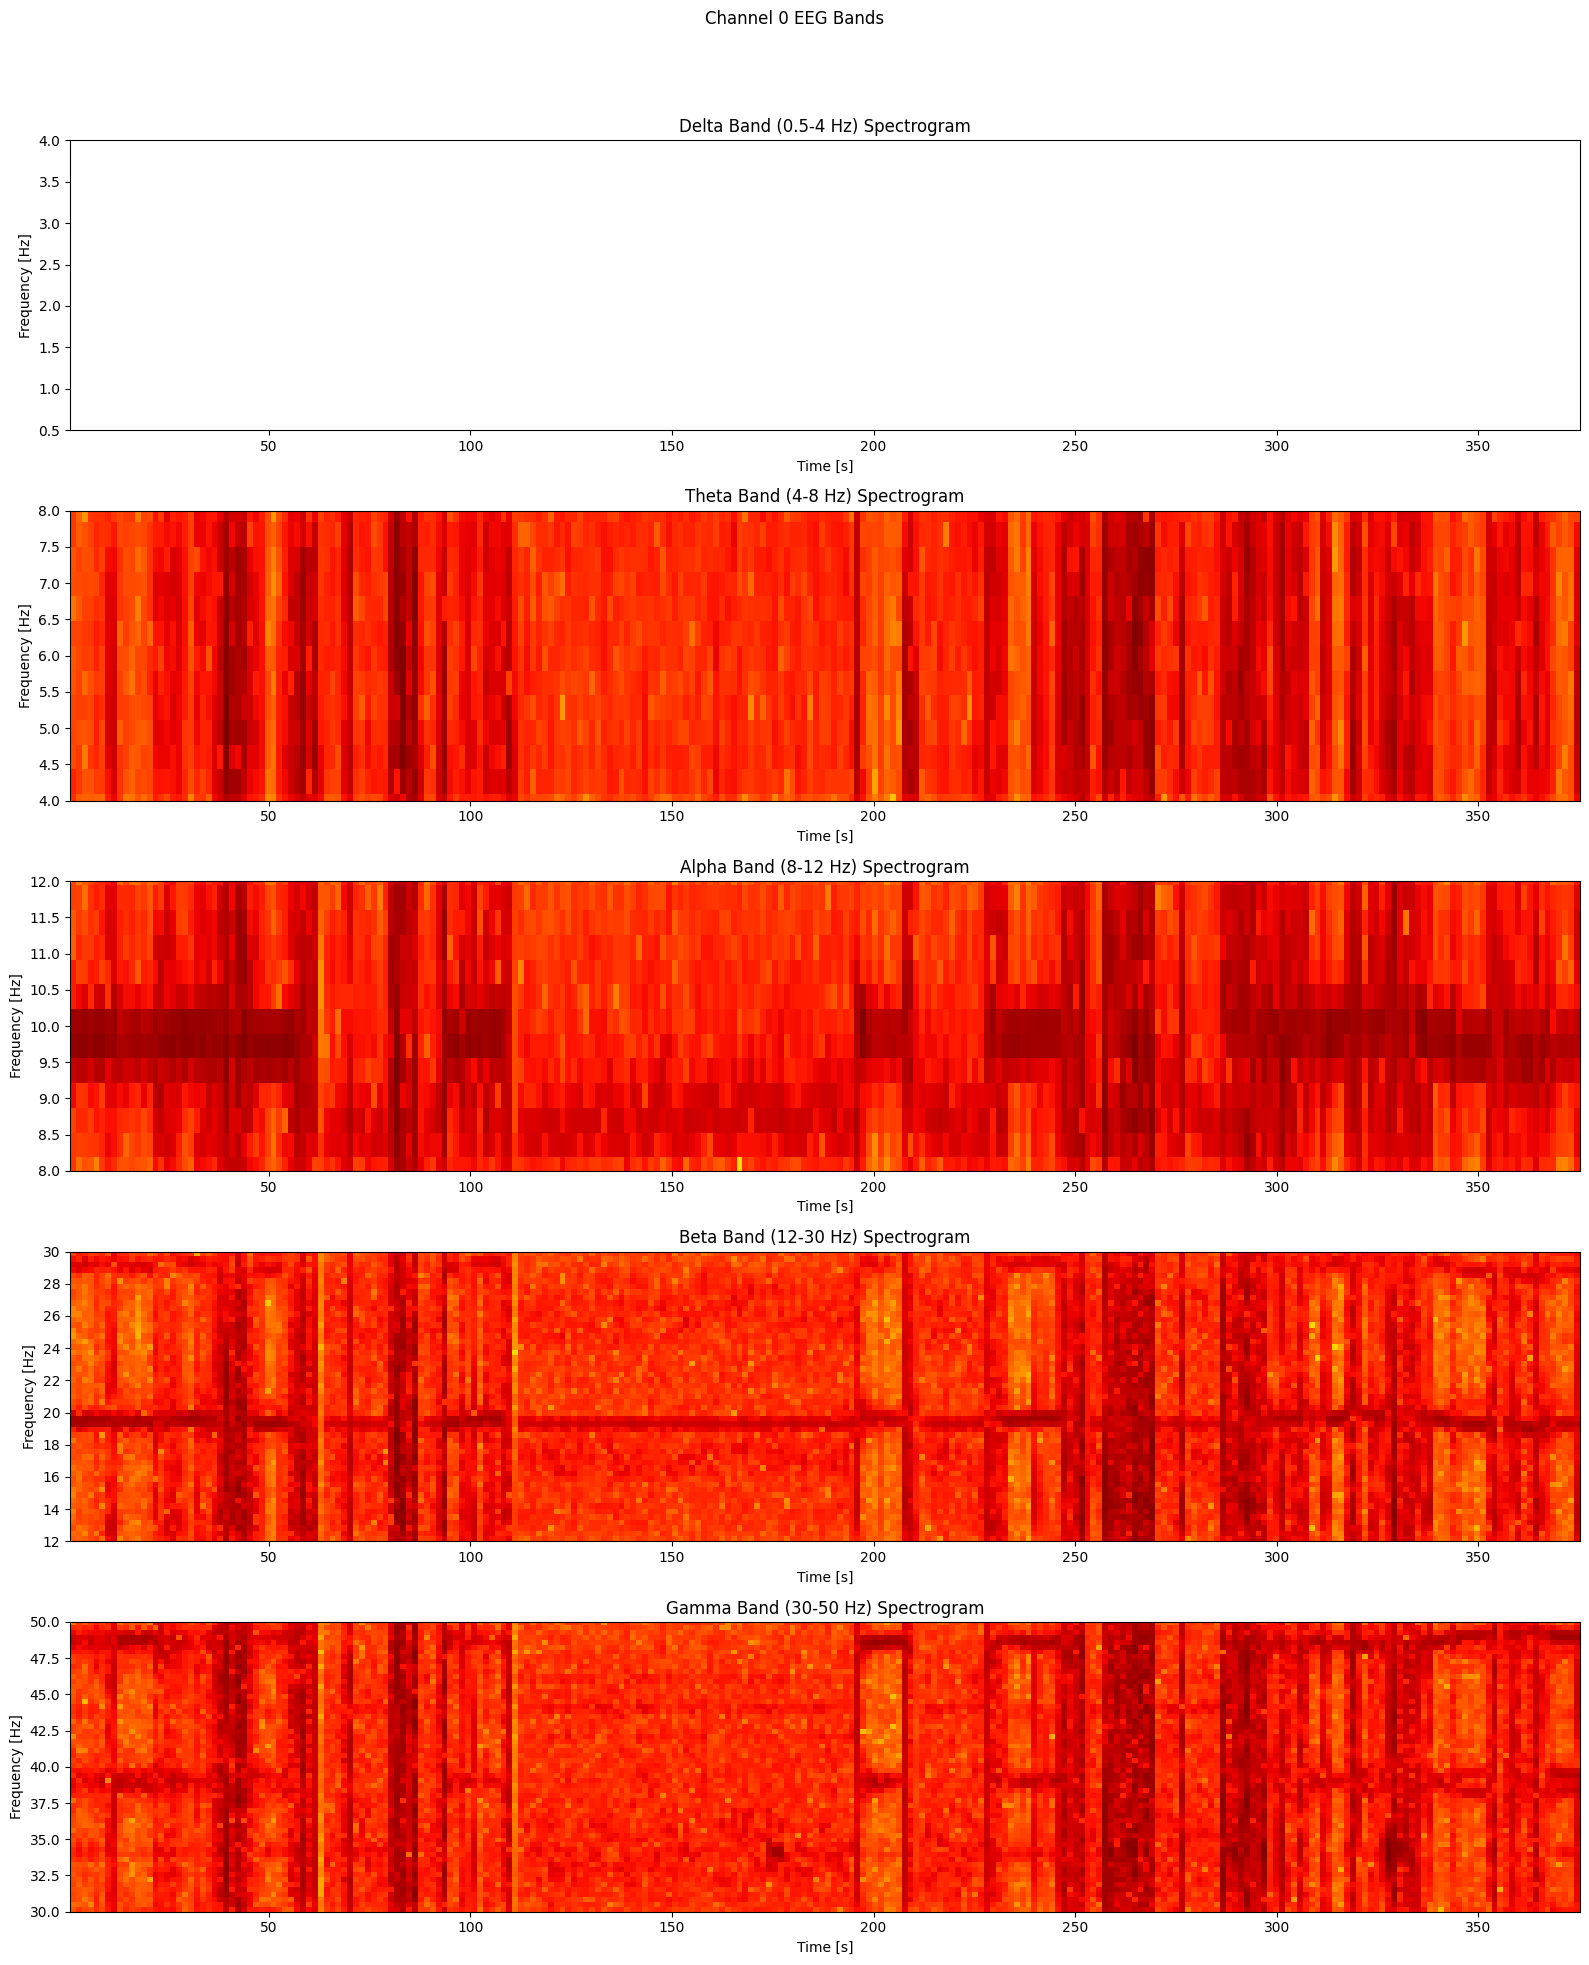

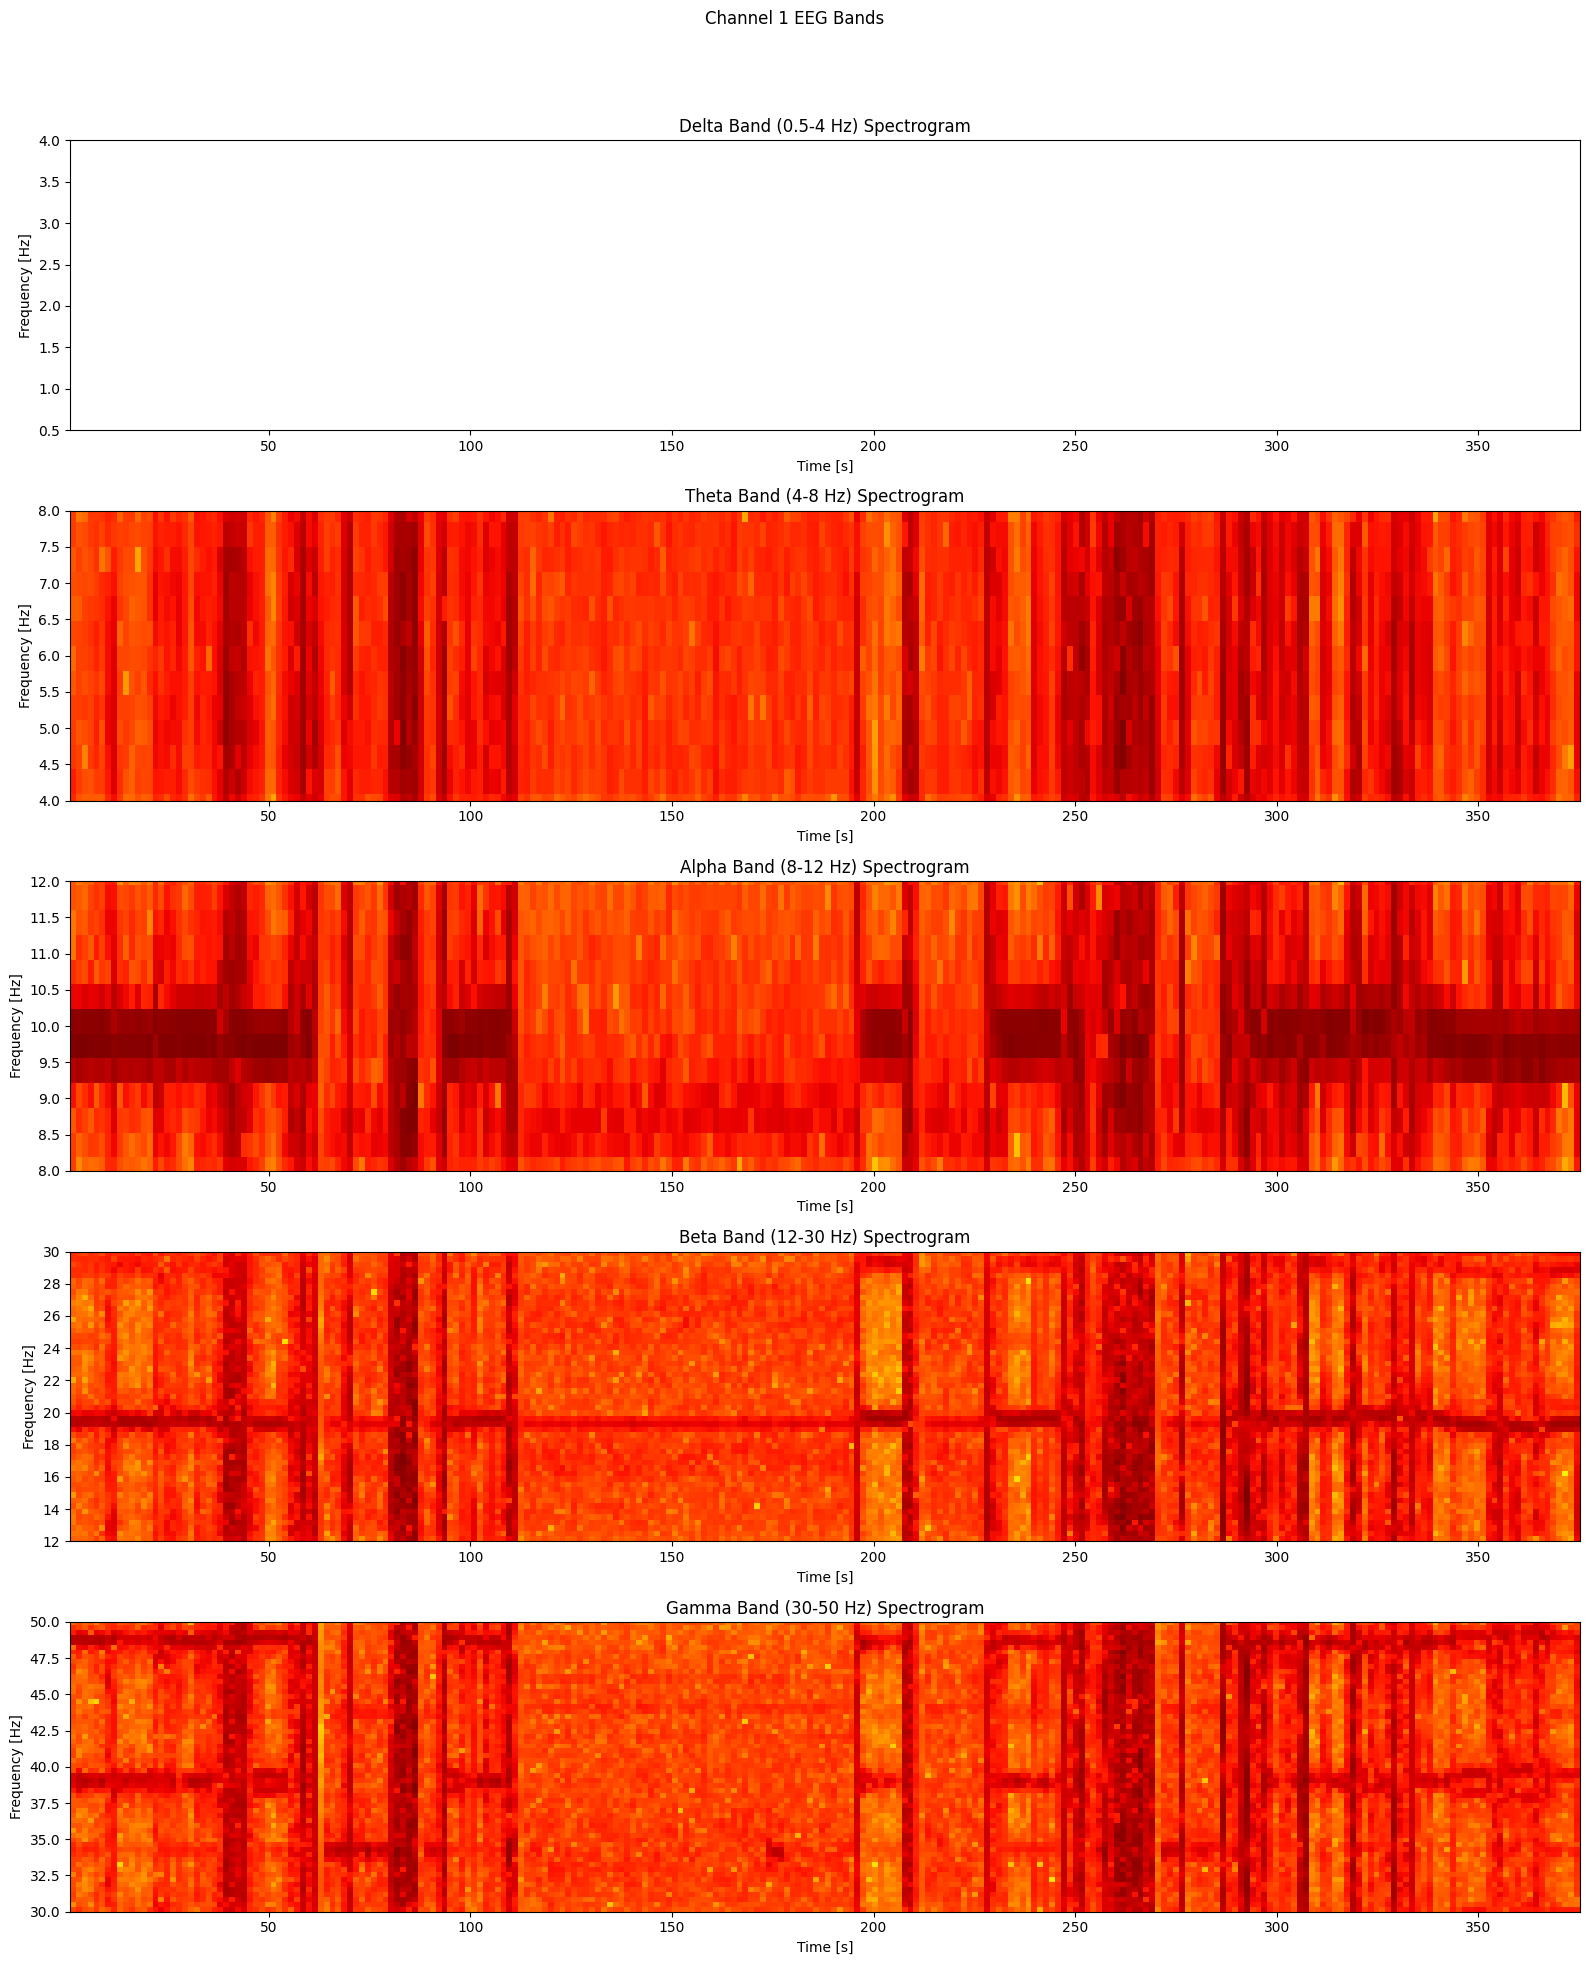

In [23]:
filename = "/home/qcd/Desktop/repos/EEG/EEG/bin/Debug/net8.0/dump.eer"
data = np.loadtxt(filename)
ydata = data[:, 1]
# ydata = [(ydata[i]/pow(2,16)) for i in range(0, len(ydata))]
xdata = data[:, 0]
print(data[:, 1])
freq_hz = 350  # np.average(np.ediff1d(xdata))/10000 # 10k ticks per second
print("avg freq: {} hz".format(freq_hz))
print("{} samples ({}s)".format(len(xdata), round(len(xdata)/freq_hz, 0)))

cutoff_freq = 40
eeg_bands = {'Delta': (0.5, 4), 'Theta': (4, 8), 'Alpha': (
    8, 12), 'Beta': (12, 30), 'Gamma': (30, 50)}


def band_pass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = spsignal.butter(order, [low, high], btype='band')
    y = spsignal.filtfilt(b, a, signal)
    return y


def ch_analysis(channel, fft_res=1024):
    global data, freq_hz  # Assuming these are defined elsewhere
    ch_data = data[:, channel+1]
    # low_pass_filter(ch_data, cutoff_freq, freq_hz)
    ch_data_filtered = ch_data

    num_bands = len(eeg_bands)
    fig, axs = plt.subplots(num_bands, 1, figsize=(16, 2 * num_bands))
    fig.set_figheight(20);

    for i, (band, (low, high)) in enumerate(eeg_bands.items()):
        ax = axs[i]
        band_data = band_pass_filter(ch_data_filtered, low, high, freq_hz)
        ax.set_title('{} Band ({}-{} Hz) Spectrogram'.format(band, low, high))
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Frequency [Hz]')
        spectrum, freqs, t, im = ax.specgram(
            band_data, Fs=freq_hz, cmap=plt.cm.jet, mode='psd', scale="dB", NFFT=fft_res, noverlap=int(fft_res/2))
        ax.set_ylim(low, high)

    fig.suptitle("Channel {} EEG Bands".format(channel))
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


ch_analysis(0)
ch_analysis(1)
